
# Banking Customer Churn Rate Prediction Use Case

## I. Introduction
This report will address Customer Churn issue in financial industry overall by applying advanced business analytic techniques. The project contains several steps including:
- Business Problem overview
- Preprocessing data
- Exploratory data analysis
- Predictive Modelling
- Model Evaluation
- Output
- Comment

## II. Problem Overview

- **SSB Bank** has been  experiencing a loss in **Revenue** in the past few years. The Marketing department has done a quick research and analysis for this issue. They are concerned that the issue is derived from the **customer churn**.
- **Customer Churn Rate** is defined as the rate at which customers stop doing business with an entity. This project will perform Exploratory Data Analysis to understand the data sample as well as determining the significant variables which could play an important role in forecasting **Customer Churn Rate**.
- The **Customer Churn Rate** is calculated as: **Customer Churn / Total number of Customers * 100**

## III. Data Preparation & Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Comment:
- As the data is quite cleaned and in appropriate data type; however, some variables need to be removed as they seem unrelated to the prediction model such as RowNumber, and Surname.
- Furthermore, as the machine will learn better with numbers; therefore, the 'Gender' variable would be decoded as Female = 0 and Male = 1. The Geography variable will be decoded accordingly after Exploratory Data Analysis step.

In [7]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df.shape

(10000, 11)

## IV. Exploratory Data Analysis

In [8]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We totally have 5 continous variables and 6 categorical variables.

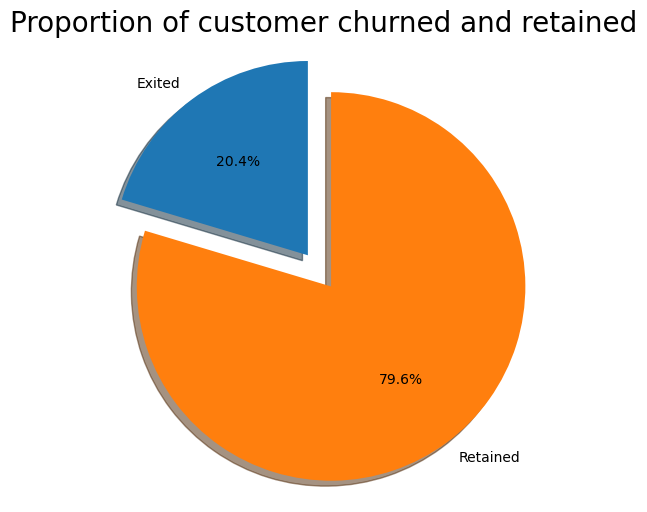

In [10]:
import matplotlib.pyplot as plt
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.2)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

- According to Accenture, attrition rates in the banking industry hover around 11%, and the annual churn rates on new customers are roughly in the 20-25% range during the first year — half of which don’t make it past the first 90 days after opening their accounts.
- Lets assume that our sample is not the new customers, then 20.4% would be very much significant compared to the industry.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

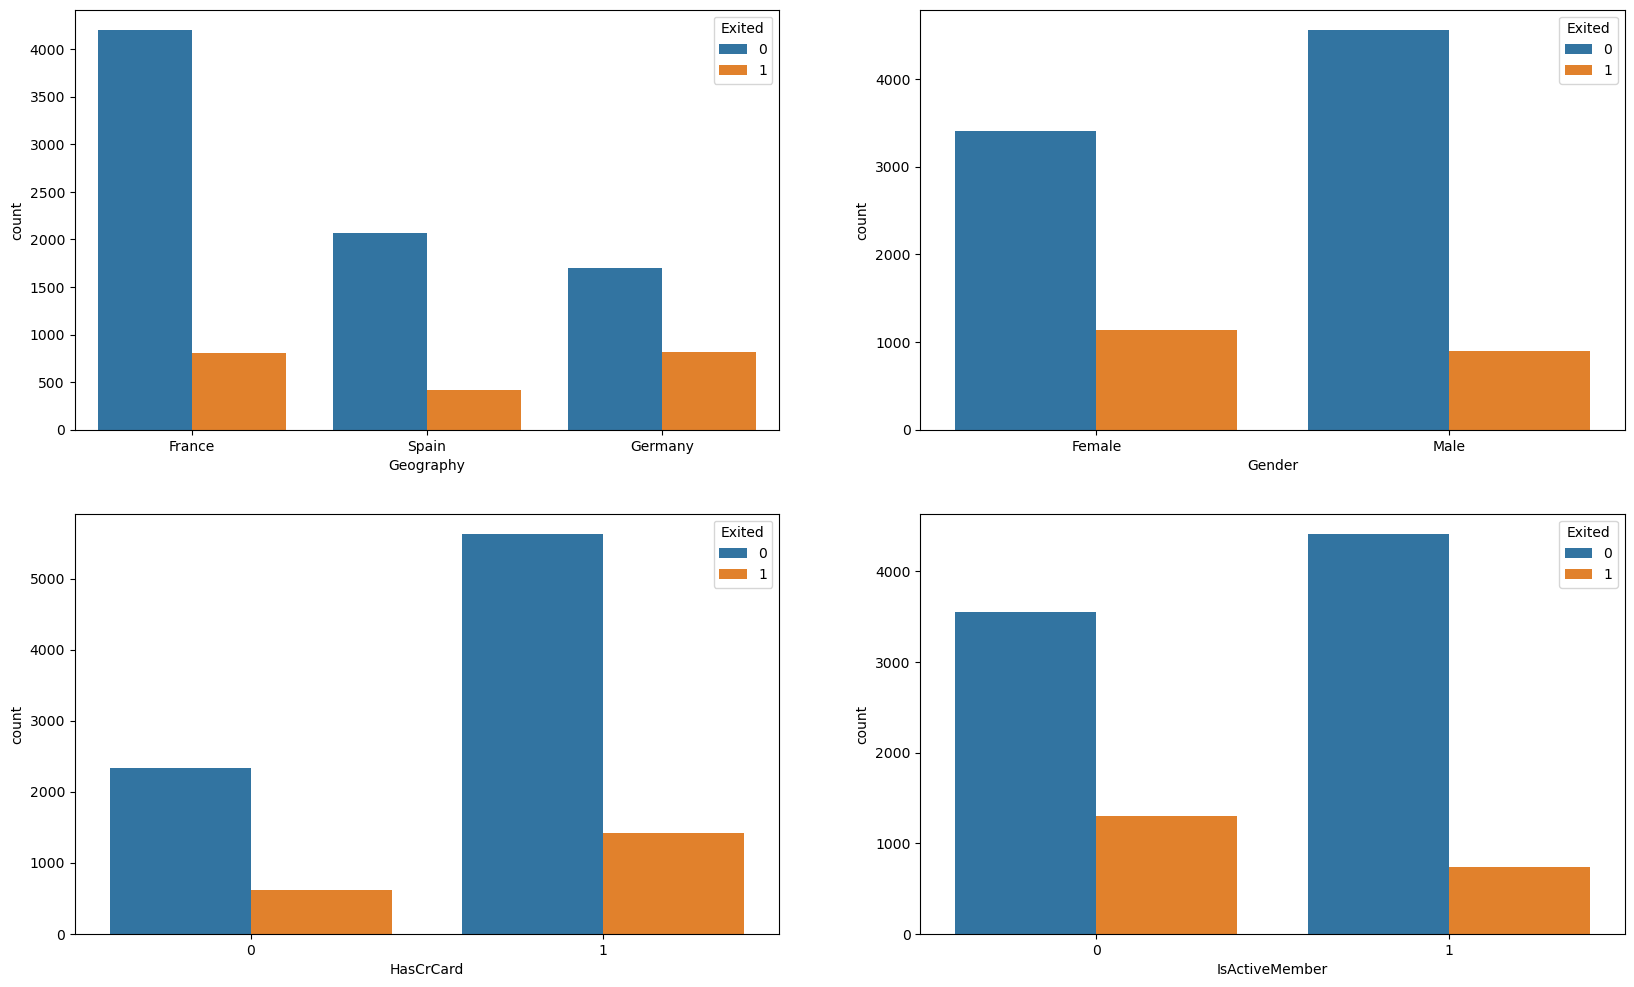

In [11]:
import seaborn as sns
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

- Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.
- The proportion of female customers churning is also greater than that of male customers
- Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.
- Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

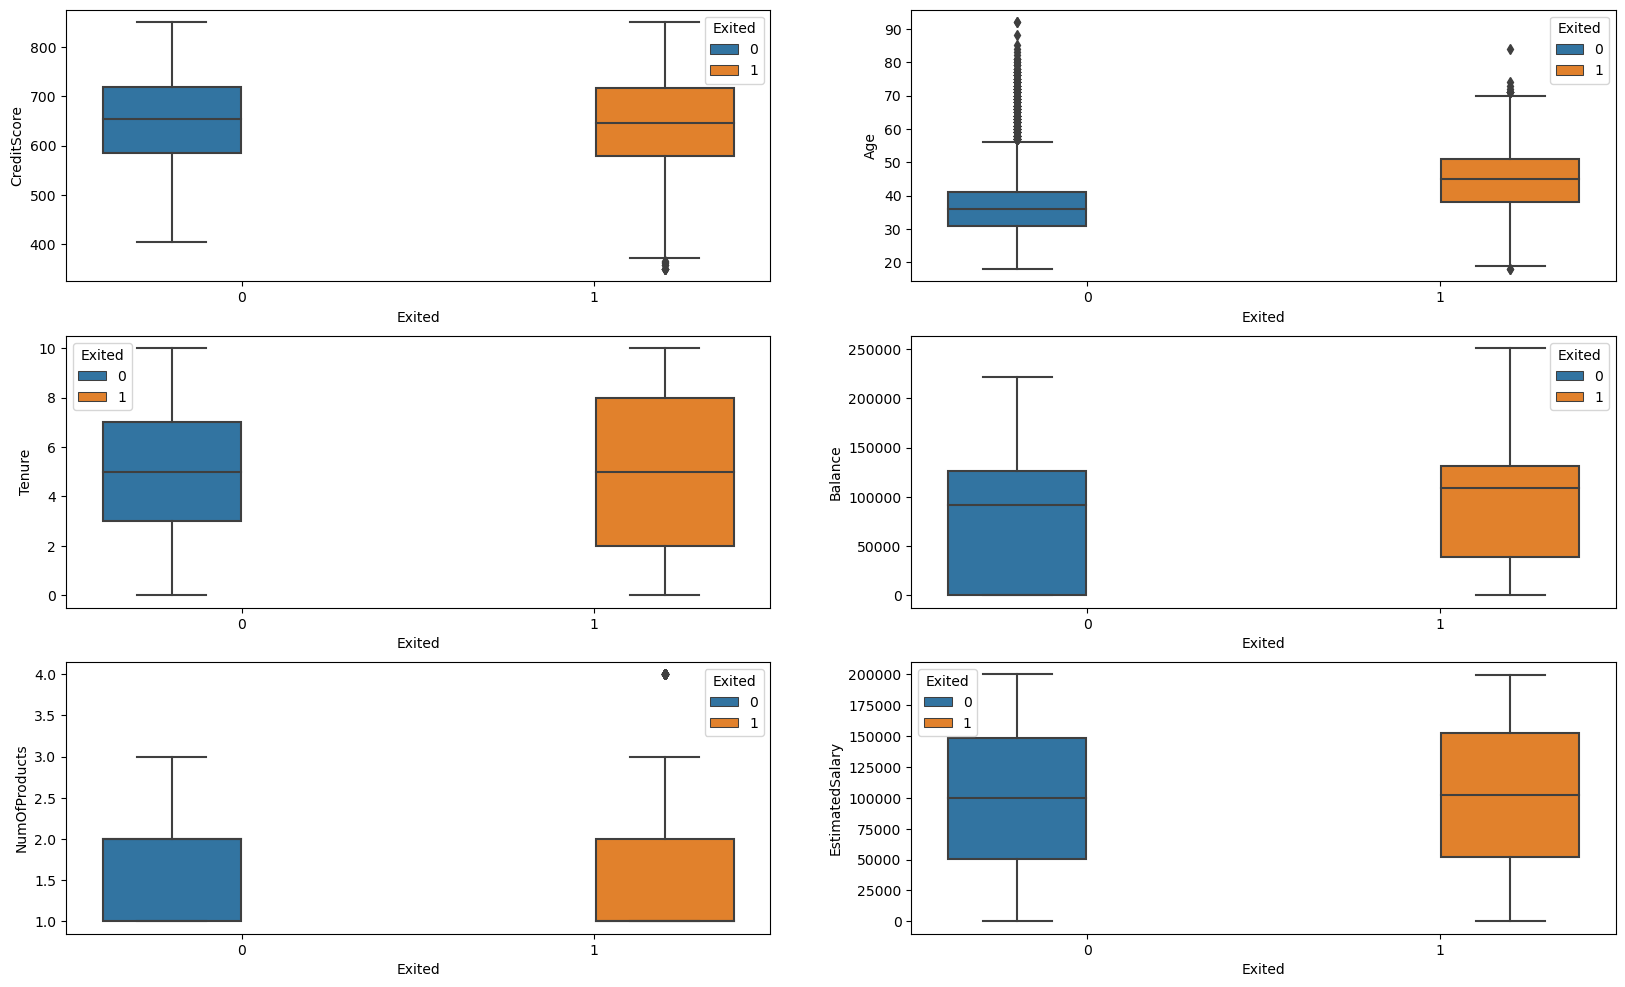

In [12]:
    # Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])
#    sns.countplot(x='Age', hue = 'Exited', data= df, ax=axarr[2][1])

We note the following:

- There is no significant difference in the credit score distribution between retained and churned customers.
- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
- With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
- Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
- Neither the product nor the salary has a significant effect on the likelihood to churn.

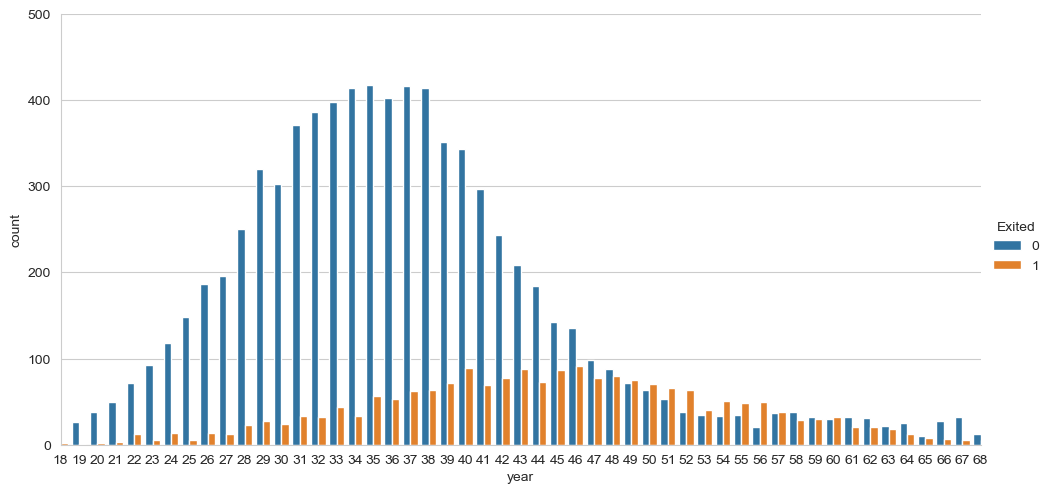

In [16]:
sns.set_style("whitegrid")
g = sns.catplot(x='Age', kind='count',hue='Exited', data=df, aspect=2)#remove hue for age overall distribution
g = g.set_axis_labels("year",'count').set(xlim=(0,50), ylim=(0,500))
plt.show(g)

## IV. Predictive Modelling
### i) Feature engineering

(-1.0, 5.0)

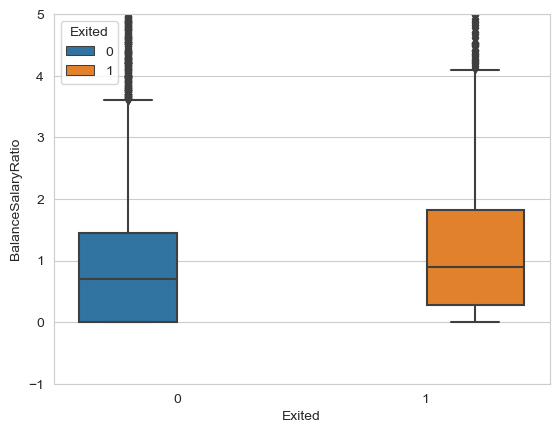

In [17]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x ='Exited',hue = 'Exited', data=df)
plt.ylim(-1,5)

we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

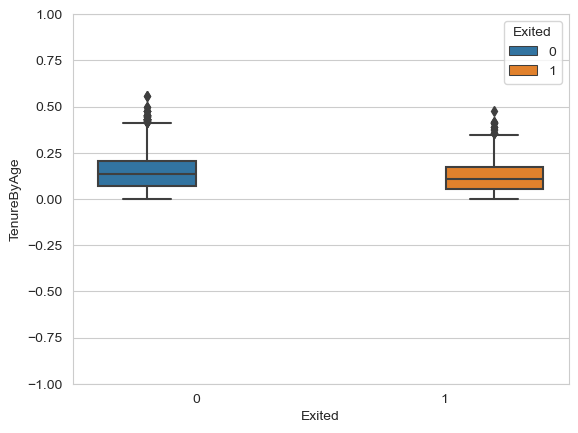

In [18]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

In [19]:
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [20]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
Mapping = dict()

Mapping['Geography'] = {'France': 0, 'Spain' : 1, 'Germany' : 2}
df['Geography'] = df.Geography.map(Mapping.get('Geography'))

In [22]:
Mapping = dict()

Mapping['Gender'] = {'Female': 0, 'Male' : 1}
df['Gender'] = df.Gender.map(Mapping.get('Gender'))

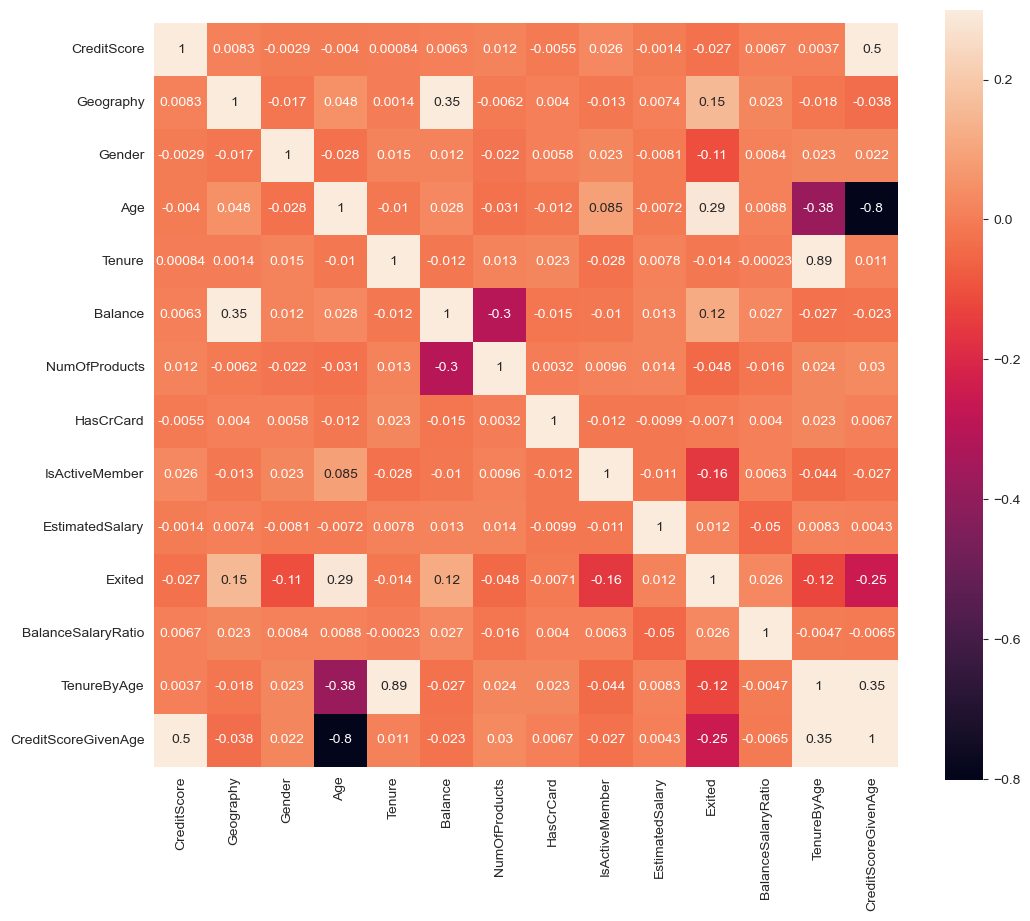

In [25]:
#sns.pairplot(df,hue = 'Exited')

ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(df.corr(), vmax=.3, square=True, annot=True)

In [28]:
X = df.iloc[:,0:14]
X = df.drop('Exited', axis = 1)
#print(X.shape)

y = df['Exited']
#print(type(y), y.shape, y)
#print('Class labels:', np.unique(y))

In [29]:
# Split Train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [30]:
np.set_printoptions(precision=3, suppress = True) # pretty printing

sc = StandardScaler()

sc.fit(X_train)

# print(dir(sc))
# print(sc.mean_, sc.scale_)


X_train_scaled = sc.transform(X_train)
print('means:', X_train.mean(axis=0), X_train_scaled.mean(axis=0))
print('sigmas', X_train.std(axis=0), X_train_scaled.std(axis=0))

X_test_scaled = sc.transform(X_test)
print('means:', X_test.mean(axis=0), X_test_scaled.mean(axis=0))
print('sigmas', X_test.std(axis=0), X_test_scaled.std(axis=0))

means: CreditScore              649.827375
Geography                  0.749750
Gender                     0.545375
Age                       38.915375
Tenure                     4.993250
Balance                76302.463255
NumOfProducts              1.534000
HasCrCard                  0.703375
IsActiveMember             0.516625
EstimatedSalary        99808.732990
BalanceSalaryRatio         4.043605
TenureByAge                0.137503
CreditScoreGivenAge       17.877385
dtype: float64 [ 0. -0. -0.  0.  0. -0. -0.  0.  0.  0.  0. -0.  0.]
sigmas CreditScore               96.713519
Geography                  0.829886
Gender                     0.497968
Age                       10.546320
Tenure                     2.901596
Balance                62554.011970
NumOfProducts              0.584069
HasCrCard                  0.456798
IsActiveMember             0.499755
EstimatedSalary        57372.979855
BalanceSalaryRatio       120.472909
TenureByAge                0.089898
CreditScoreGivenA

### Logistic Regression

In [35]:
# Training Model
lr = LogisticRegression(C=100, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=100, multi_class='ovr', random_state=1)

In [36]:
y_train_pred=lr.predict(X_train_scaled)
#lr.predict_proba(X_train_scaled)

In [37]:
y_pred = lr.predict(X_test_scaled)
reason = lr.predict_proba(X_test_scaled)

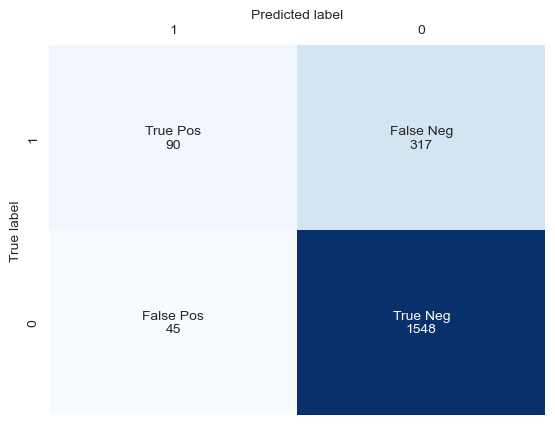

In [38]:
labels = [1,0]
confmat2 = confusion_matrix(y_true=y_test, y_pred=y_pred, labels = labels)

group_counts = ["{0:0.0f}".format(value) for value in confmat2.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in confmat2.flatten()/np.sum(confmat2)]
group_names = ['True Pos', 'False Neg','False Pos', 'True Neg']




labels3 = [f"{v2}\n{v3}" for v2, v3 in zip(group_names, group_counts)]
# labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]



labels3 = np.asarray(labels3).reshape(2,2)

fig, ax = plt.subplots()
sns.heatmap(confmat2, annot=labels3, fmt='',xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted label')    
ax.xaxis.set_label_position('top') 
ax.set_ylabel('True label')

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

In [39]:
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_train_pred):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_train_pred):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_train_pred):.3f}')
print(f'F1: {f1_score(y_true=y_train, y_pred=y_train_pred):.3f}')



print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_pred):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_pred):.3f}')

Accuracy: 0.819
Precision: 0.665
Recall: 0.223
F1: 0.334
Accuracy: 0.819
Precision: 0.667
Recall: 0.221
F1: 0.332


#### Comment
- 
- 

### Perceptron

In [40]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.2, random_state=1)
ppn.fit(X_train_scaled, y_train)

print('--- Estimated Weights ---')
print('intercept:\n', ppn.intercept_)
print('coefficients:\n', ppn.coef_)
print('No epochs:\n', ppn.n_iter_)

--- Estimated Weights ---
intercept:
 [-1.6]
coefficients:
 [[-0.125 -0.     0.146 -0.202  0.341  0.485 -0.249 -0.163 -0.347  0.382
   1.306  0.07  -0.681]]
No epochs:
 8


In [41]:
y_train_pred = ppn.predict(X_train_scaled)

y_test_pred = ppn.predict(X_test_scaled)

In [42]:
print(f'Accuracy: {accuracy_score(y_true=y_train, y_pred=y_train_pred):.3f}')
print(f'Precision: {precision_score(y_true=y_train, y_pred=y_train_pred):.3f}')
print(f'Recall: {recall_score(y_true=y_train, y_pred=y_train_pred):.3f}')
print(f'F1: {f1_score(y_true=y_train, y_pred=y_train_pred):.3f}')


print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_test_pred):.3f}')
print(f'Precision: {precision_score(y_true=y_test, y_pred=y_test_pred):.3f}')
print(f'Recall: {recall_score(y_true=y_test, y_pred=y_test_pred):.3f}')
print(f'F1: {f1_score(y_true=y_test, y_pred=y_test_pred):.3f}')

Accuracy: 0.778
Precision: 0.375
Recall: 0.131
F1: 0.194
Accuracy: 0.780
Precision: 0.389
Recall: 0.138
F1: 0.203


### Support Vector Machine

In [43]:
from sklearn.svm import SVC

In [44]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=1)

In [45]:
print(f'Accuracy = {svm.score(X_train_scaled, y_train):.3f}')
print(f'Accuracy = {svm.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.796
Accuracy = 0.796


In [46]:
svm2 = SVC(kernel='rbf', gamma = 0.10, C=10.0, random_state=1)
svm2.fit(X_train_scaled, y_train)

SVC(C=10.0, gamma=0.1, random_state=1)

In [47]:
print(f'Accuracy = {svm2.score(X_train_scaled, y_train):.3f}')
print(f'Accuracy = {svm2.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.896
Accuracy = 0.852


In [48]:
svm3 = SVC(kernel='rbf', gamma = 0.3, C=10.0, random_state=1)
svm3.fit(X_train_scaled, y_train)

SVC(C=10.0, gamma=0.3, random_state=1)

In [49]:
print(f'Accuracy = {svm3.score(X_train_scaled, y_train):.3f}')
print(f'Accuracy = {svm3.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.970
Accuracy = 0.816


In [50]:
y_pred=svm3.predict(X_test_scaled)

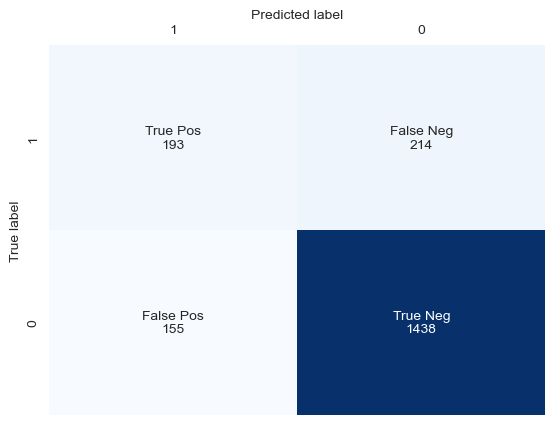

In [51]:
labels = [1,0]
confmat2 = confusion_matrix(y_true=y_test, y_pred=y_pred, labels = labels)

group_counts = ["{0:0.0f}".format(value) for value in confmat2.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in confmat2.flatten()/np.sum(confmat2)]
group_names = ['True Pos', 'False Neg','False Pos', 'True Neg']




labels3 = [f"{v2}\n{v3}" for v2, v3 in zip(group_names, group_counts)]
# labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]



labels3 = np.asarray(labels3).reshape(2,2)

fig, ax = plt.subplots()
sns.heatmap(confmat2, annot=labels3, fmt='',xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted label')    
ax.xaxis.set_label_position('top') 
ax.set_ylabel('True label')

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

### Decision Tree Learning

In [39]:
#!pip install --upgrade numpy

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 4, random_state=1)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [53]:
print(f'Accuracy = {tree_model.score(X_train_scaled, y_train):.3f}')
print(f'Accuracy = {tree_model.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.851
Accuracy = 0.856


In [67]:
y_pred=tree_model.predict(X_test_scaled)

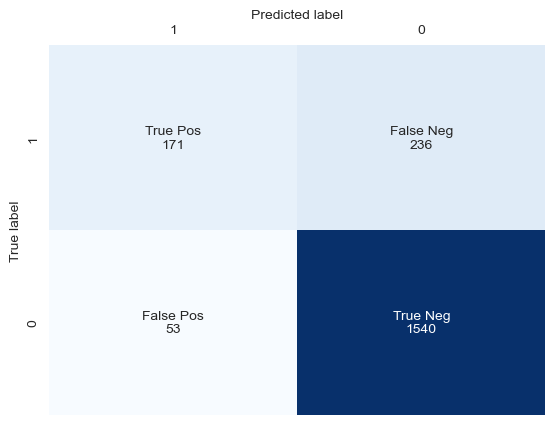

In [68]:
labels = [1,0]
confmat2 = confusion_matrix(y_true=y_test, y_pred=y_pred, labels = labels)

group_counts = ["{0:0.0f}".format(value) for value in confmat2.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in confmat2.flatten()/np.sum(confmat2)]
group_names = ['True Pos', 'False Neg','False Pos', 'True Neg']




labels3 = [f"{v2}\n{v3}" for v2, v3 in zip(group_names, group_counts)]
# labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]



labels3 = np.asarray(labels3).reshape(2,2)

fig, ax = plt.subplots()
sns.heatmap(confmat2, annot=labels3, fmt='',xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted label')    
ax.xaxis.set_label_position('top') 
ax.set_ylabel('True label')

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=1)#n_estimators is the number of decision tree
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=25, random_state=1)

In [62]:
print(f'Accuracy = {forest.score(X_train_scaled, y_train):.3f}')
print(f'Accuracy = {forest.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.998
Accuracy = 0.855


In [69]:
y_pred=forest.predict(X_test_scaled)

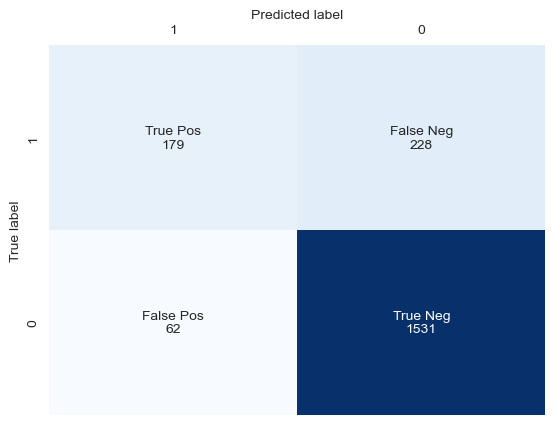

In [70]:
labels = [1,0]
confmat2 = confusion_matrix(y_true=y_test, y_pred=y_pred, labels = labels)

group_counts = ["{0:0.0f}".format(value) for value in confmat2.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in confmat2.flatten()/np.sum(confmat2)]
group_names = ['True Pos', 'False Neg','False Pos', 'True Neg']




labels3 = [f"{v2}\n{v3}" for v2, v3 in zip(group_names, group_counts)]
# labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]



labels3 = np.asarray(labels3).reshape(2,2)

fig, ax = plt.subplots()
sns.heatmap(confmat2, annot=labels3, fmt='',xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted label')    
ax.xaxis.set_label_position('top') 
ax.set_ylabel('True label')

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2, p=1, metric='minkowski')

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [65]:
print(f'Accuracy = {knn.score(X_train_scaled, y_train):.3f}')
print(f'Accuracy = {knn.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.891
Accuracy = 0.823


G:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [71]:
y_pred=knn.predict(X_test_scaled)

G:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


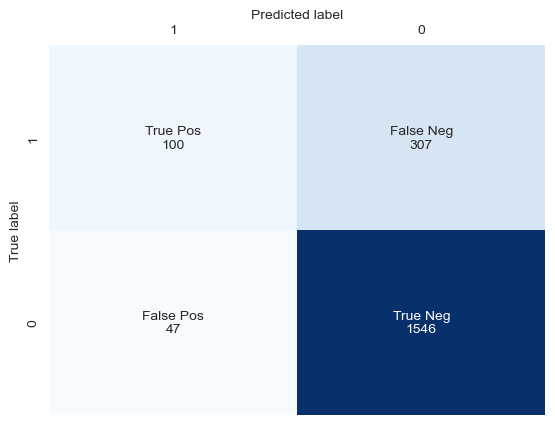

In [72]:
labels = [1,0]
confmat2 = confusion_matrix(y_true=y_test, y_pred=y_pred, labels = labels)

group_counts = ["{0:0.0f}".format(value) for value in confmat2.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in confmat2.flatten()/np.sum(confmat2)]
group_names = ['True Pos', 'False Neg','False Pos', 'True Neg']




labels3 = [f"{v2}\n{v3}" for v2, v3 in zip(group_names, group_counts)]
# labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]



labels3 = np.asarray(labels3).reshape(2,2)

fig, ax = plt.subplots()
sns.heatmap(confmat2, annot=labels3, fmt='',xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted label')    
ax.xaxis.set_label_position('top') 
ax.set_ylabel('True label')

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

### XGBoost

In [74]:
from xgboost import XGBClassifier
XGB = XGBClassifier(base_score=0.5, gamma=0.1)
XGB.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [75]:
print(f'Accuracy = {XGB.score(X_train_scaled, y_train):.3f}')
print(f'Accuracy = {XGB.score(X_test_scaled, y_test):.3f}')

Accuracy = 0.967
Accuracy = 0.850


In [76]:
y_pred=XGB.predict(X_test_scaled)

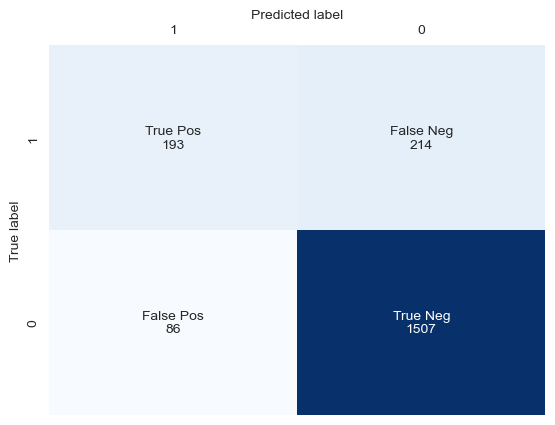

In [77]:
labels = [1,0]
confmat2 = confusion_matrix(y_true=y_test, y_pred=y_pred, labels = labels)

group_counts = ["{0:0.0f}".format(value) for value in confmat2.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in confmat2.flatten()/np.sum(confmat2)]
group_names = ['True Pos', 'False Neg','False Pos', 'True Neg']




labels3 = [f"{v2}\n{v3}" for v2, v3 in zip(group_names, group_counts)]
# labels3 = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]



labels3 = np.asarray(labels3).reshape(2,2)

fig, ax = plt.subplots()
sns.heatmap(confmat2, annot=labels3, fmt='',xticklabels=labels, yticklabels=labels, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted label')    
ax.xaxis.set_label_position('top') 
ax.set_ylabel('True label')

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

## GridSearch

In [ ]:
#GridSearch
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

In [ ]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Exited)
best_model(log_pol2_Grid)

In [ ]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

In [ ]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)